## Baseline 2
#### Simple CNN network using tensorflow img classification tutorial
https://www.tensorflow.org/tutorials/images/classification

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
file = '../data/home_sale_data_324.csv'

data = pd.read_csv(file)
labels = data['label']
data.drop(['label'], axis=1, inplace=True)
data

,OverallQual,GrLivArea,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,...,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA,dummy_1,dummy_2,dummy_3
0,170.000000,158.457928,102.0,105.939007,93.911290,236.210526,78.206067,100.101743,242.065217,127.50,...,0.0,0.0,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0
1,141.666667,128.466198,102.0,57.177727,78.830645,163.736842,110.707476,140.801846,192.173913,127.50,...,0.0,255.0,0.0,0.0,0.0,255.0,255.0,0.0,0.0,0.0
2,170.000000,162.770063,102.0,105.939007,104.193548,232.184211,83.421900,107.687970,238.369565,127.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,170.000000,158.862827,153.0,41.806467,110.020161,73.815789,69.972189,112.269528,79.456522,63.75,...,255.0,255.0,255.0,255.0,0.0,0.0,255.0,0.0,0.0,0.0
4,198.333333,183.419443,153.0,105.939007,143.266129,228.157895,101.473134,130.633656,236.521739,127.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,85.000000,114.264465,0.0,22.641785,0.000000,147.631579,52.279413,52.523624,181.086957,63.75,...,0.0,255.0,0.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0
2907,85.000000,114.264465,51.0,22.641785,49.012097,147.631579,52.279413,52.523624,181.086957,63.75,...,0.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0
2908,113.333333,125.460827,102.0,41.806467,98.709677,169.105263,107.718617,137.608942,162.608696,63.75,...,255.0,255.0,255.0,255.0,0.0,255.0,255.0,0.0,0.0,0.0
2909,113.333333,102.675592,0.0,15.371260,0.000000,206.684211,82.772069,113.248477,221.739130,63.75,...,0.0,255.0,0.0,0.0,255.0,255.0,255.0,0.0,0.0,0.0


In [4]:
'''one-hot encode the labels'''

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
# print(list(integer_encoded))
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels = onehot_encoder.fit_transform(integer_encoded)
print(labels)




[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [5]:
'''test reshape'''
tmp = [[1,2,3,4], [5,6, 7,8], [9,10,11,12]]
tmp = np.array(tmp)
tmp.shape
tmp.reshape(3,2,2)


array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

In [6]:
data_np = data.to_numpy()
data_np.shape
data_np = data_np.reshape(len(data), 18, 18)
data_np.shape

(2911, 18, 18)

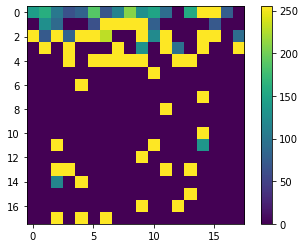

In [7]:
# data_np[0].shape

nArray = np.array(data_np[99])


a11=nArray.reshape(18,18)
plt.imshow(a11)
plt.colorbar()
plt.show()

In [8]:
labels.shape

(2911, 4)

In [9]:
train_examples = data_np
train_examples.shape

(2911, 18, 18)

In [10]:
val_examples = train_examples[-291:]
train_examples = train_examples[:-291]
val_labels = labels[-291:]
train_labels = labels[:-291]

train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_examples, val_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-19 15:15:46.652872: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-19 15:15:46.653257: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(18, 18), dtype=tf.float64, name=None), TensorSpec(shape=(4,), dtype=tf.float64, name=None))>

In [12]:
train_examples.shape
val_examples.shape

(291, 18, 18)

In [13]:
trainX = train_examples.reshape(2620, 18,18,1)
trainY = train_labels

testX = val_examples.reshape(291, 18,18,1)
testY = val_labels


In [14]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
BATCH_SIZE = 16
SHUFFLE_BUFFER_SIZE = 64
epochs = 25

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)

num_classes = 4

# model = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(1, 3, padding='same', activation='relu', input_shape=(18, 18, 1)),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(num_classes, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])


# '''anotehr ver'''

data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal", input_shape=(18, 18, 1)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(18, 18, 1)),
	tf.keras.layers.MaxPooling2D((2, 2)),
	tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  	tf.keras.layers.MaxPooling2D(),
  	tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Dropout(0.2),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dense(4, activation='softmax')
])

# opt = tf.keras.optimizers.SGD(lr=0.005, momentum=0.9)
opt = tf.keras.optimizers.Adam(lr=0.005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 18, 18, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 32)          4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)        

In [23]:
# train_examples.reshape(-1, 18,18,1)
history = model.fit(trainX, trainY, epochs=epochs,validation_data=(testX, testY), batch_size=64)


Epoch 1/100
41/41 [==============================] - 1s 12ms/step - loss: 1.2757 - accuracy: 0.3958 - val_loss: 1.4013 - val_accuracy: 0.2921
Epoch 2/100
41/41 [==============================] - 0s 11ms/step - loss: 1.2574 - accuracy: 0.4107 - val_loss: 1.3689 - val_accuracy: 0.3436
Epoch 3/100
41/41 [==============================] - 0s 11ms/step - loss: 1.2636 - accuracy: 0.4069 - val_loss: 1.3966 - val_accuracy: 0.3402
Epoch 4/100
41/41 [==============================] - 0s 11ms/step - loss: 1.2718 - accuracy: 0.4069 - val_loss: 1.3996 - val_accuracy: 0.3162
Epoch 5/100
41/41 [==============================] - 0s 11ms/step - loss: 1.2877 - accuracy: 0.3893 - val_loss: 1.3432 - val_accuracy: 0.3333
Epoch 6/100
41/41 [==============================] - 0s 11ms/step - loss: 1.2859 - accuracy: 0.3855 - val_loss: 1.3896 - val_accuracy: 0.3196
Epoch 7/100
41/41 [==============================] - 0s 12ms/step - loss: 1.2501 - accuracy: 0.4206 - val_loss: 1.4247 - val_accuracy: 0.3402
Epoch 

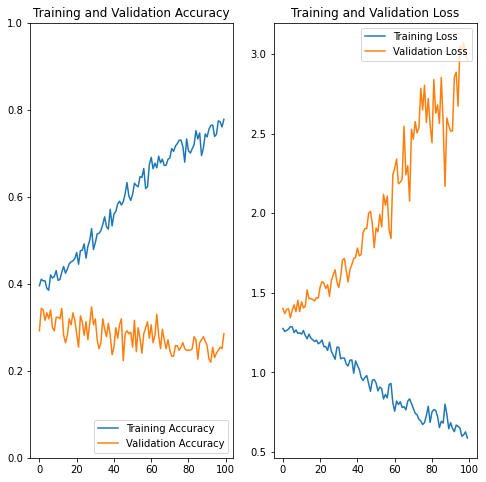

In [25]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:
%reset -f

In [72]:
model.evaluate(test_dataset)

157/157 [==============================] - 1s 4ms/step - loss: 0.6444 - sparse_categorical_accuracy: 0.9575


[0.6444269418716431, 0.9575000405311584]

In [ ]:
# epochs = 25
# # history = model.fit(train_dataset, epochs=epochs, validation_data=(val_examples, val_labels))
# history = model.fit(train_dataset, epochs=epochs)
